# Data Transformation: Google Earth Engine Images to TensorFlow

## Preamble

In [1]:
import ee
import numpy

In [2]:
ee.Initialize()

## Transformation

In [3]:
#data_source = "LANDSAT/LC8_L1T_TOA"
data_source = "LANDSAT/LE07/C01/T1_SR"
date_range = start_date, end_date = ("2000-01-01", "2018-01-01")

cloud_cover = 5 # ?

n = 10 # length of series

bands = {
    "R": "B3", 
    "G": "B2",
    "B": "B1"
}

region_coords = [5.727906, 51.993435,
         5.588144, 51.944356]
region = ee.Geometry.Rectangle(
    region_coords
)


In [4]:
img_series = ee.ImageCollection(
    data_source
).filterDate(
    start_date, end_date
).filterBounds(
    region
).filter(
    ee.Filter.lt("CLOUD_COVER", cloud_cover)
).select(
    list(bands.values())
)
img_series = img_series.toList(img_series.size())

In [5]:
img_arrays = []
for i in range(n):
    band_arrays = [
        numpy.array(
            ee.Image(
                img_series.get(i)
            ).sampleRectangle(
                region=region,
                defaultValue=0
            ).get(
                bands[color]
            ).getInfo() 
        )
        for color in ("R", "G", "B")
    ]
    band_arrays = [numpy.expand_dims(band_array, 2) for band_array in band_arrays]
    img = numpy.concatenate(band_arrays, 2)
    img_arrays.append(img)

In [6]:
len(img_arrays)

10

In [7]:
img_arrays[1].shape

(198, 329, 3)

In [8]:
def normalize(data):
    '''
    Normalize the data from 0->1
    '''
    
    norm = (data-data.min())/(data.max()-data.min())
    
    return norm

In [9]:
img_arrays = [normalize(img_array) for img_array in img_arrays]

In [10]:
import matplotlib.pyplot as plt

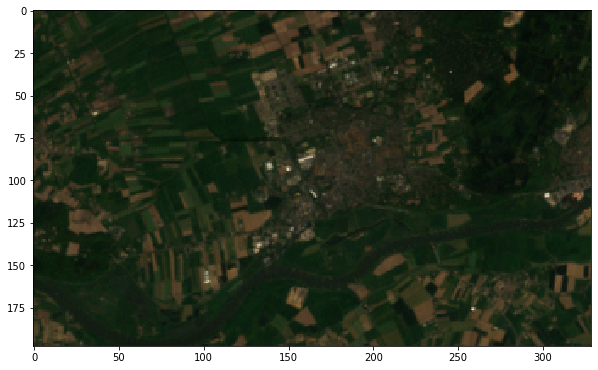

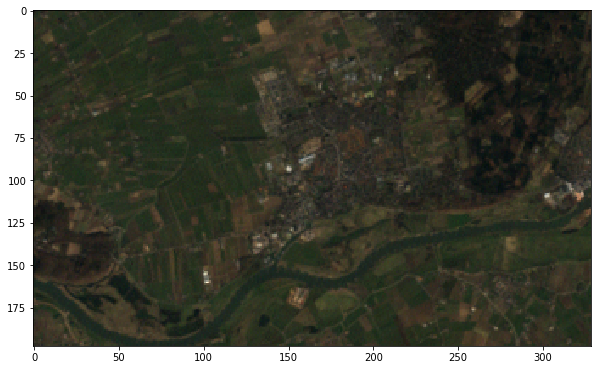

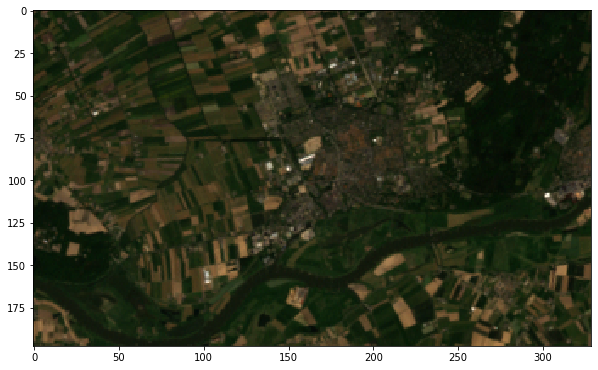

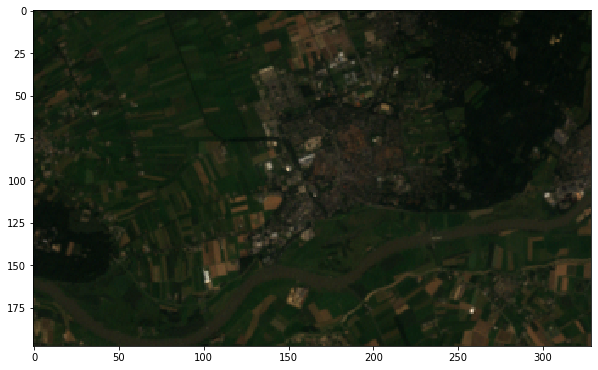

In [11]:
for i in range(4):
    plt.figure(figsize=(10, 10))
    plt.imshow(img_arrays[i])